Module 4
This week we will be looking at Enterococcus levels in the Hudson River, using data from the organization Riverkeeper ( http://www.riverkeeper.org/).

Background: Enterococcus is a fecal indicating bacteria that lives in the intestines of humans and other warm-blooded animals. Enterococcus (“ Entero”) counts are useful as a water quality indicator due to their abundance in human sewage, correlation with many human pathogens and low abundance in sewage free environments. The United States Environmental Protection Agency (EPA) reports Entero counts as colonies (or cells) per 100 ml of water.


Riverkeeper has based its assessment of acceptable water quality on the 2012 Federal Recreational Water Quality Criteria from the US EPA. Unacceptable water is based on an illness rate of 32 per 1000 swimmers.

The federal standard for unacceptable water quality is a single sample value of greater than 110 Enterococcus/100 mL, or five or more samples with a geometric mean (a weighted average) greater than 30 Enterococcus/100 mL.

Data: I have provided the data on our github page, in the folder
https://github.com/charleyferrari/CUNY_DATA608/tree/master/lecture4/Data. I have not cleaned it – you need to do so.

This assignment must be done in python. It must be done using the ‘bokeh’, 'seaborn', or 'pandas' package. You may turn in either a . py file or an ipython notebook file.

Questions:

- Create lists & graphs of the best and worst places to swim in the dataset.
- The testing of water quality can be sporadic. Which sites have been tested most regularly? Which ones have long gaps between tests? Pick out 5-10 sites and visually compare how regularly their water quality is tested.
- Is there a relationship between the amount of rain and water quality? Show this relationship graphically. If you can, estimate the effect of rain on quality at different sites and create a visualization to compare them.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import matplotlib.image as mpimg
plt.style.use('ggplot')
#from bokeh.plotting import figure, output_file, show
#from bokeh.io import output_file, show
#from bokeh.layouts import widgetbox
#import re

In [11]:
river = pd.read_csv("https://raw.githubusercontent.com/charleyferrari/CUNY_DATA608/master/lecture4/Data/riverkeeper_data_2013.csv", sep=",")
river['Date'] = pd.to_datetime(river.Date)

river['EnteroCount'] = pd.to_numeric(pd.Series(river['EnteroCount'].str.replace('>|<',"")))

river.describe()
river.head()

#Create copies for each question
river_water = copy.copy(river)
river_rain = copy.copy(river)

In [12]:
#Best places to swim


#Group by and get mean of the Site Entropy count

river_swim = river.groupby('Site').agg(['mean','count'])
(river_swim['EnteroCount']['count']< 5) & (river_swim['EnteroCount']['mean'] > 110)

river_swim['swim'] = np.where(
    ((river_swim['EnteroCount']['count']< 5) & (river_swim['EnteroCount']['mean'] > 110)) |
    ((river_swim['EnteroCount']['count'] > 5) & (river_swim['EnteroCount']['mean'] > 30)), 
    'Worst', 'Best')

del river_swim['FourDayRainTotal']
river_swim

EnteroCount       SampleCount        \
                                                mean count        mean count   
Site                                                                           
125th St. Pier                            179.696970    66          66    66   
79th St. mid-channel                       47.204082    49          49    49   
Albany Rowing Dock                        280.944444    36          36    36   
Annesville Creek                           83.421053    38          38    38   
Athens                                    201.314286    35          35    35   
Beacon Harbor                              52.657895    38          38    38   
Bethlehem Launch Ramp                     231.694444    36          36    36   
Castle Point, NJ                           37.076923    39          39    39   
Castleton                                 186.000000    35          35    35   
Catskill Creek- East End                  261.238095    42          42    42   
Catskill Creek- First Bridge              305.947368    38          38    38   
Catskill Launch Ramp                      132.378378    37          37    37   
Cedar Pond Brook                          199.702128    47          47    47   
Coeymans Landing                          186.555556    36          36    36   
Cold Spring Harbor                         22.542857    35          35    35   
Congress St. Bridge- Troy                 247.315789    38          38    38   
Coxsackie Waterfront Park                 170.457143    35          35    35   
Croton Point Beach                         15.458333    48          48    48   
Dunn Memorial Bridge- Albany              357.973684    38          38    38   
Dyckman Street Beach                       30.236842    38          38    38   
East River mid-channel at 23rd St.         45.340000    50          50    50   
East River mid-channel at Roosevelt Is.    48.250000    48          48    48   
Emeline Beach- Haverstraw                 298.078947    38          38    38   
Esopus Creek Entrance                     263.558140    43          43    43   
Esopus Creek West                         224.571429    42          42    42   
Fort Montgomery                            88.138889    36          36    36   
Furnace Brook                             172.520833    48          48    48   
GW Bridge mid-channel                      58.183673    49          49    49   
Gay's Point mid-channel                   193.888889    36          36    36   
Gowanus Canal                            4206.837838    37          37    37   
...                                              ...   ...         ...   ...   
Mohawk River at Waterford                 621.057143    35          35    35   
Newburgh Launch Ramp                      351.052632    38          38    38   
Newtown Creek- Dutch Kills               1205.087719    57          57    57   
Newtown Creek- Metropolitan Ave. Bridge  2953.684211    57          57    57   
Norrie Point Yacht Basin                  128.805556    36          36    36   
Norrie Point mid-channel                   43.777778    36          36    36   
North River STP at 145th                  200.106383    47          47    47   
Nyack Launch Ramp                         105.032787    61          61    61   
Orangetown STP Outfall                    854.192982    57          57    57   
Ossining Beach                            206.957447    47          47    47   
Peekskill Riverfront Green Park           187.285714    42          42    42   
Pier 96 Kayak Launch                       40.205128    39          39    39   
Piermont Pier                             482.165775   187         187   187   
Port Ewen Drinking Water Intake            62.135135    37          37    37   
Poughkeepsie Drinking Water Intake          8.342105    38          38    38   
Poughkeepsie Launch Ramp                   17.675676    37          37    37   
Rondout- Eddyville Anchorage             

In [13]:
river_swim['Site1'] = river_swim.index
river_swim.reset_index(drop=True)

river_swim = pd.DataFrame(river_swim.to_records())
del river_swim['Site']
river_swim

,"('EnteroCount', 'mean')","('EnteroCount', 'count')","('SampleCount', 'mean')","('SampleCount', 'count')","('swim', '')","('Site1', '')"
0,179.696970,66,66,66,Worst,125th St. Pier
1,47.204082,49,49,49,Worst,79th St. mid-channel
2,280.944444,36,36,36,Worst,Albany Rowing Dock
3,83.421053,38,38,38,Worst,Annesville Creek
4,201.314286,35,35,35,Worst,Athens
5,52.657895,38,38,38,Worst,Beacon Harbor
6,231.694444,36,36,36,Worst,Bethlehem Launch Ramp
7,37.076923,39,39,39,Worst,"Castle Point, NJ"
8,186.000000,35,35,35,Worst,Castleton
9,261.238095,42,42,42,Worst,Catskill Creek- East End


In [14]:
#Prepartation on Swimming data

river_swim.columns =['EnteroCount_mean','EnteroCount_count','SampleCount_mean','SampleCount_count','Swim','Site']
del river_swim['SampleCount_count']

river_swim_sort = river_swim.sort_values("EnteroCount_mean",ascending=False).head()
river_swim_sort = river_swim_sort.append(river_swim.sort_values("EnteroCount_mean",ascending=False).tail() , ignore_index=True)
river_swim_sort

,EnteroCount_mean,EnteroCount_count,SampleCount_mean,Swim,Site
0,4206.837838,37,37,Worst,Gowanus Canal
1,2953.684211,57,57,Worst,Newtown Creek- Metropolitan Ave. Bridge
2,2205.666667,27,27,Worst,Tarrytown Marina
3,1455.760000,50,50,Worst,Saw Mill River
4,1296.072727,165,165,Worst,Upper Sparkill Creek
5,17.675676,37,37,Best,Poughkeepsie Launch Ramp
6,17.526316,38,38,Best,Little Stony Point
7,17.340909,44,44,Best,Stony Point mid-channel
8,15.458333,48,48,Best,Croton Point Beach
9,8.342105,38,38,Best,Poughkeepsie Drinking Water Intake


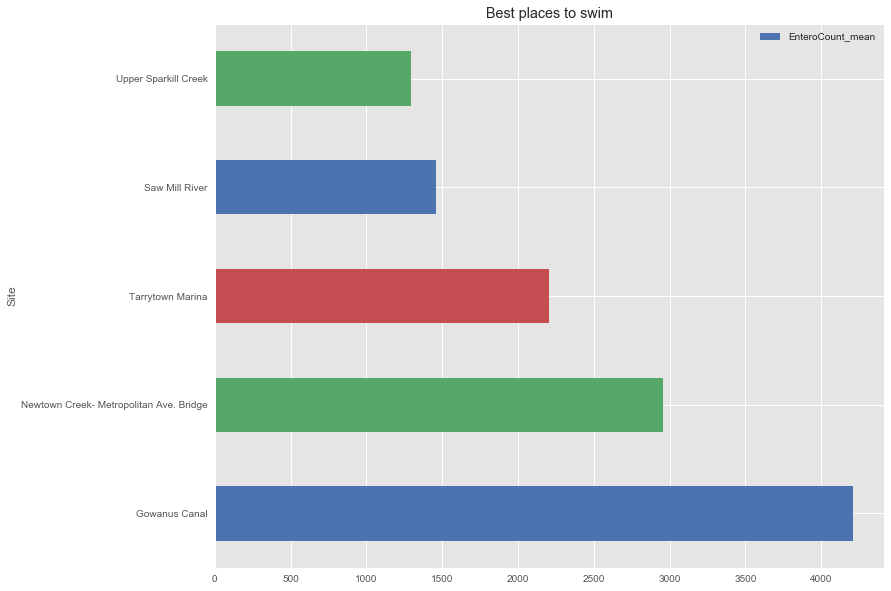

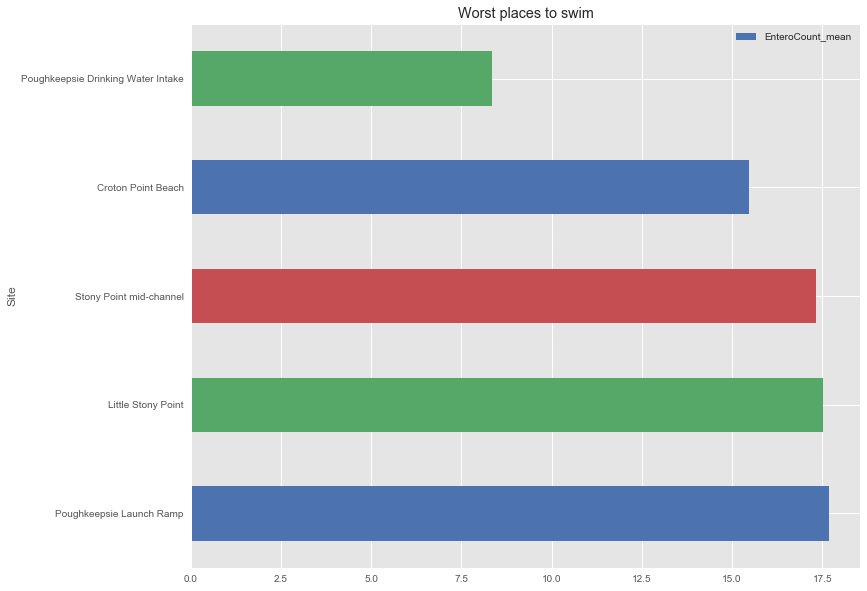

In [15]:
#Best and workst places to swim charts

#Best
plt.rcParams['figure.figsize'] = (12,10)
river_swim.sort_values("EnteroCount_mean",ascending=False).head().plot(x= "Site", y = "EnteroCount_mean", \
                                                                       kind="barh", color=sns.color_palette("deep", 3))
sns.plt.title("Best places to swim")
sns.plt.show()

#Worst

river_swim.sort_values("EnteroCount_mean",ascending=False).tail().plot(x= "Site", y = "EnteroCount_mean", kind="barh", color=sns.color_palette("deep", 3))
sns.plt.title("Worst places to swim")
sns.plt.show()

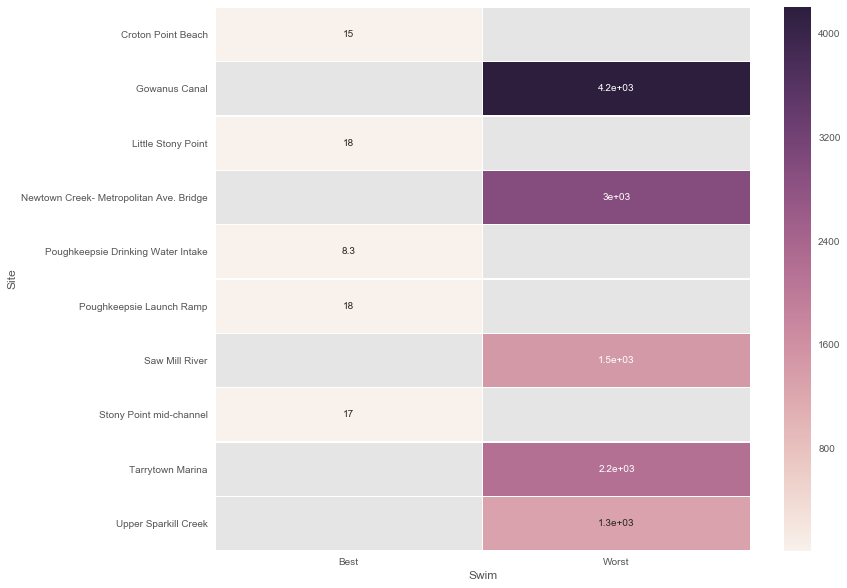

In [16]:
river_swim_heat = river_swim_sort.pivot("Site", "Swim", "EnteroCount_mean")
sns.heatmap(river_swim_heat, annot=True, linewidths=.5)
sns.plt.show()

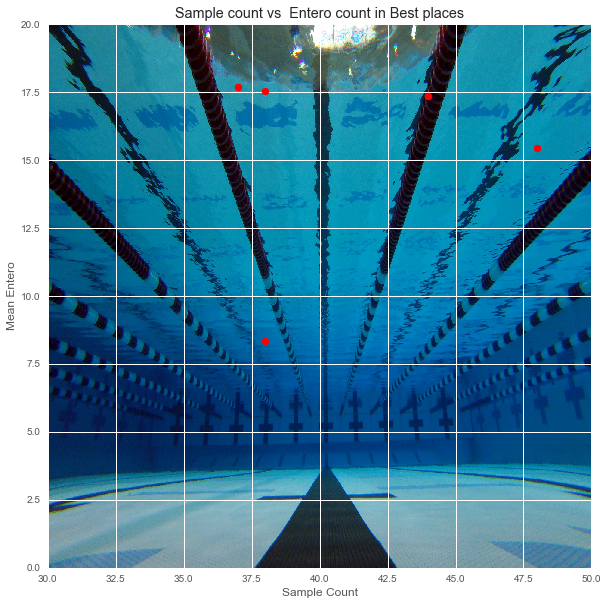

In [17]:
# Best places to swim using Images in background
river_swim_sort_tail = river_swim.sort_values("EnteroCount_mean",ascending=False).tail()

image = mpimg.imread("img\\swim.jpg")

plt.scatter(x = river_swim_sort_tail.SampleCount_mean.get_values(), y = river_swim_sort_tail.EnteroCount_mean.get_values(), zorder=1 ,color ="red")
plt.imshow(image, zorder=0, extent = [30,50,0,20])
plt.xlabel("Sample Count")
plt.ylabel("Mean Entero")
plt.title("Sample count vs  Entero count in Best places")
plt.show()

In [18]:
river_swim_sort

,EnteroCount_mean,EnteroCount_count,SampleCount_mean,Swim,Site
0,4206.837838,37,37,Worst,Gowanus Canal
1,2953.684211,57,57,Worst,Newtown Creek- Metropolitan Ave. Bridge
2,2205.666667,27,27,Worst,Tarrytown Marina
3,1455.760000,50,50,Worst,Saw Mill River
4,1296.072727,165,165,Worst,Upper Sparkill Creek
5,17.675676,37,37,Best,Poughkeepsie Launch Ramp
6,17.526316,38,38,Best,Little Stony Point
7,17.340909,44,44,Best,Stony Point mid-channel
8,15.458333,48,48,Best,Croton Point Beach
9,8.342105,38,38,Best,Poughkeepsie Drinking Water Intake


Question 2:

- The testing of water quality can be sporadic. Which sites have been tested most regularly?
Which ones have long gaps between tests? Pick out 5-10 sites and visually compare how
regularly their water quality is tested.

In [19]:
river_water_list = np.array(river_water.Site.unique())

final_water_df = pd.DataFrame([])

#Look for all Site date Difference

for sites in river_water_list:
    river_water_hudson = river_water[river_water['Site'] ==sites]
    river_water_hudson = river_water_hudson.sort_values('Date',ascending=False)
  
    river_water_hudson=river_water_hudson.reset_index(drop=True)
    
    river_water_hudson['Diff'] = (river_water_hudson['Date'] - river_water_hudson['Date'].shift(-1))/ np.timedelta64(1,'D')
    
    #river_water_hudson['Diff'] = pd.to_numeric([re.findall('\d*',s)[0] for s in river_water_hudson['Diff']])
    final_water_df = final_water_df.append(river_water_hudson)

final_water_df=final_water_df.reset_index(drop=True)
final_water_df.dropna(inplace=True)

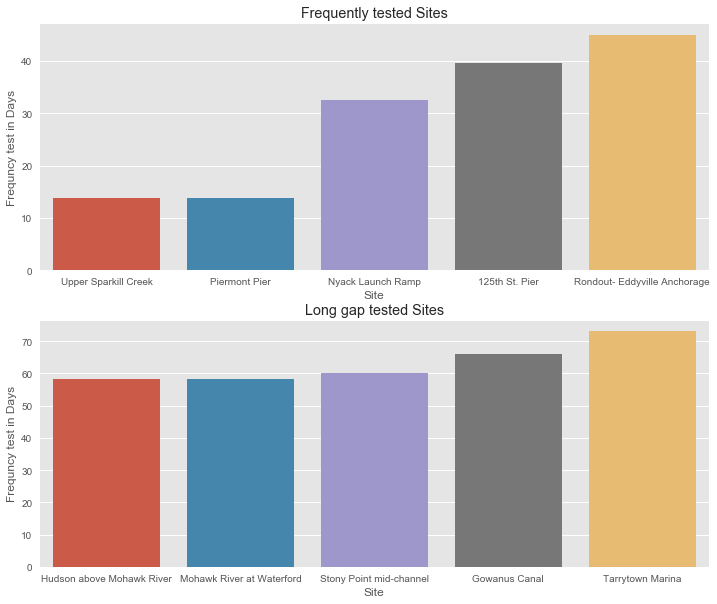

In [20]:
# Short and Long gap between tests
final_water_df_rank = final_water_df.groupby('Site').mean().sort_values('Diff')

#Frequently tested sites
final_water_df_rank_freq = final_water_df_rank.head(5)

#Long gap sites
final_water_df_rank_tail = final_water_df_rank.tail(5)

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
plt.rcParams['figure.figsize'] = (14,10)

#Bar plot head
sns.barplot(x= final_water_df_rank_freq.index, y = 'Diff', data =final_water_df_rank_freq, orient ='v', ax= ax1)
ax1.set(xlabel = "Site" ,ylabel = "Frequncy test in Days") 
ax1.set_title("Frequently tested Sites")

#Bar plot tail
sns.barplot(x= final_water_df_rank_tail.index, y = 'Diff', data =final_water_df_rank_tail, orient ='v', ax = ax2)
ax2.set(xlabel = "Site", ylabel = "Frequncy test in Days") 
ax2.set_title("Long gap tested Sites")
sns.plt.show()


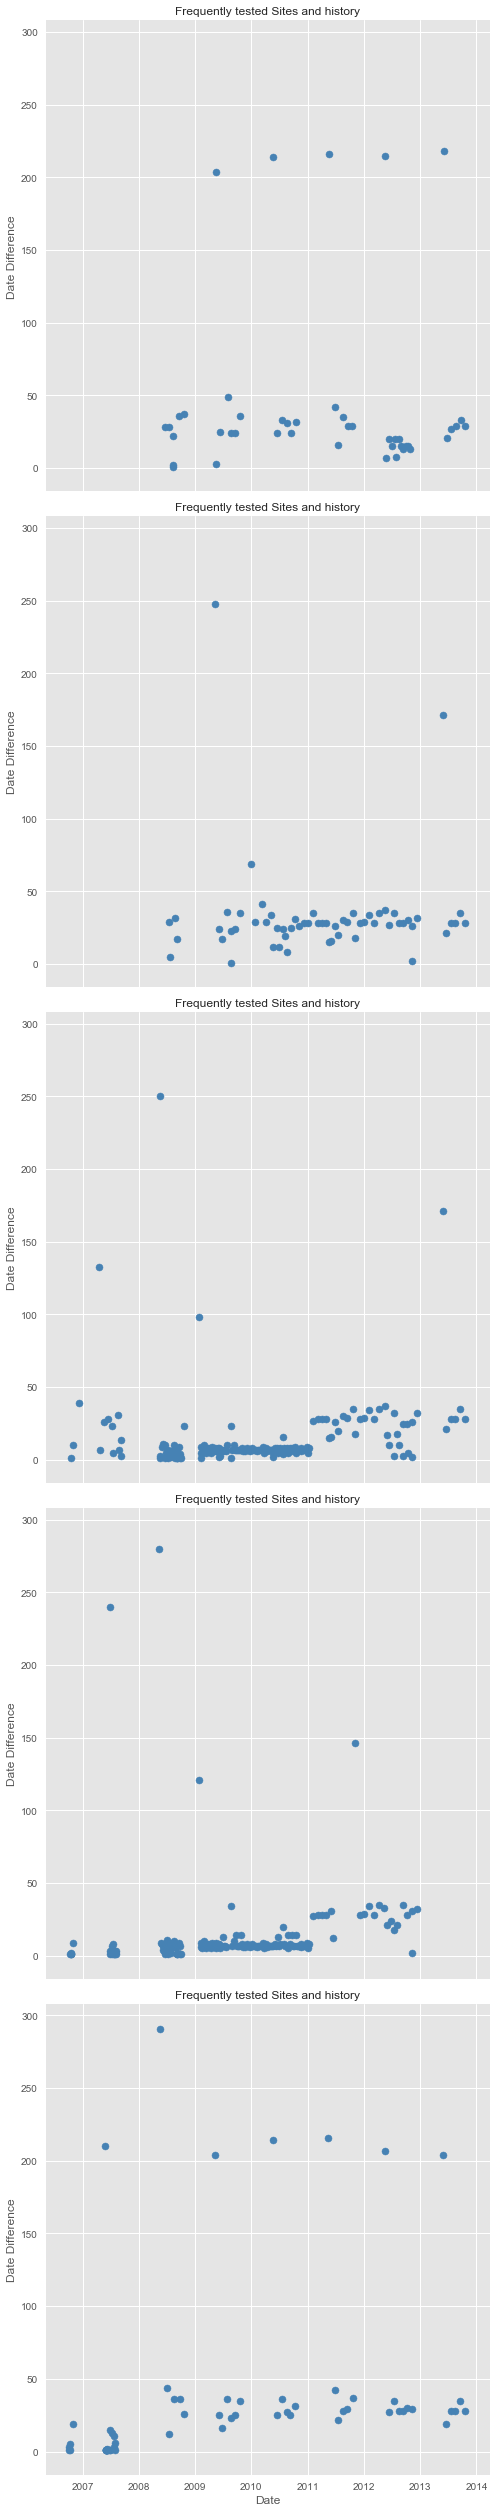

In [21]:
#Fetch parent final data

water_df_hist = final_water_df[final_water_df['Site'].isin(final_water_df_rank_freq.index)]

#Plots
g= sns.FacetGrid(water_df_hist, row = "Site",size=7)
g = g.map(plt.scatter,"Date","Diff", color = "steelblue")
g.set_titles("Frequently tested Sites and history")
g.set_ylabels("Date Difference")
sns.plt.show()


- Is there a relationship between the amount of rain and water quality? Show this relationship graphically. If you can, estimate the effect of rain on quality at different sites and create a visualization to compare them.

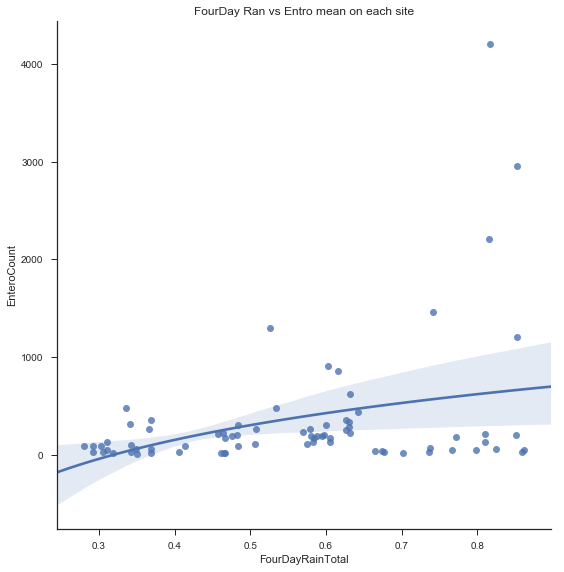

Correlation Coefficient:


0.36408050023753918

In [46]:
# Relationship between the amount of rain and water quality
river_rain = copy.copy(river)

river_rain = river_rain.groupby('Site').mean()

#Regression plot 
sns.lmplot(x = "FourDayRainTotal" ,y = "EnteroCount", data = river_rain, logx=True, size=8)
sns.plt.title("FourDay Ran vs Entro mean on each site")
sns.plt.show()


# Pearson Correlation Coefficient
print("Correlation Coefficient:")
np.corrcoef(river_rain.FourDayRainTotal.get_values(), river_rain.EnteroCount.get_values())[1][0]

From above charts and numbers, there are relation (0.36 Correlation) between Rain and water quality(Enteropy). We can try predicting the Enteropy from water quality.